<a href="https://colab.research.google.com/github/Praneeth-18/NLP-Research-and-Experiments/blob/main/257_Final_Research_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Take 2 random poems recently written, scrape at least 20 pushcart nominated poems (see last assignment)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pickle
import pandas as pd

## **save poems into pkl**

In [ ]:
# URLs to scrape
urls = [
    "https://iowapoetry.com/pushcart.htm",
    "https://iowapoetry.com/pushcart2021.htm",
    "https://iowapoetry.com/pushcart2022.htm",
    "https://iowapoetry.com/pushcart2023.htm"
]

# Google Drive path to store the cached poems
cache_file_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Final_Exam_Scraped_Poems/pushcart_poems.pkl'

def load_cached_poems(cache_file_path):
    if os.path.exists(cache_file_path):
        with open(cache_file_path, 'rb') as file:
            poems = pickle.load(file)
        return poems
    return None

def save_poems_to_cache(poems, cache_file_path):
    with open(cache_file_path, 'wb') as file:
        pickle.dump(poems, file)

def scrape_poems(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        poems = []
        elements = soup.find_all(['h1', 'p', 'br', 'h3'])
        current_author = None
        current_poem = []
        current_title = None
        collecting_poem = False

        for element in elements:
            if element.name == 'h1':
                if current_author and current_poem:
                    poem_text = '\n\n'.join([line.strip() for line in current_poem if line.strip()])
                    poems.append((current_author, current_title, poem_text))
                    current_poem = []
                    current_title = None
                current_author = element.text.strip()
                collecting_poem = True
            elif element.name == 'p' and collecting_poem:
                text = element.get_text(separator="\n").strip()
                if text:
                    if not current_title:
                        current_title = text.split('\n')[0].strip()
                        text = '\n'.join(text.split('\n')[1:])
                    current_poem.append(text)
            elif element.name == 'br' and collecting_poem:
                current_poem.append("")
            elif element.name == 'h3' and collecting_poem:
                if current_author and current_poem:
                    poem_text = '\n\n'.join([line.strip() for line in current_poem if line.strip()])
                    poems.append((current_author, current_title, poem_text))
                    current_poem = []
                    current_title = None
                collecting_poem = False
                break

        if current_author and current_poem:
            poem_text = '\n\n'.join([line.strip() for line in current_poem if line.strip()])
            poems.append((current_author, current_title, poem_text))

        return poems
    else:
        print(f"Failed to retrieve the web page: {url}")
        return []

def get_all_poems(urls, cache_file_path):
    poems = load_cached_poems(cache_file_path)
    if poems is None:
        all_poems = []
        for url in urls:
            all_poems.extend(scrape_poems(url))
        save_poems_to_cache(all_poems, cache_file_path)
        return all_poems
    return poems


In [ ]:
all_poems = get_all_poems(urls, cache_file_path)

# Print the poems in the desired format
for author, title, poem in all_poems:
    print(f"Writer: {author}")
    print(f"Poem Title: {title}")
    print(f"Poem:\n{poem}")
    print("\n" + "="*50 + "\n")

Writer: Kelsey Bigelow
Poem Title: SIDERODROMOPHOBIA
Poem:
FEAR OF TRAINS

Never did I expect your Amtrak express
to tear through my ribcage
then pour alcohol on my raw heart

Because of you
I still cringe at train whistles and vodka shots

I lack trust for men who ask me to board
because you brought me into your drunken viewing car
though you already imagined me tied to your tracks

The only thing I can count on
is that each swig of scotch will shred my throat
and still be softer than you


Writer: Janet Carl
Poem Title: SPRING IN TOWN - 1942
Poem:
If wise Eve had never tasted that sweet fruit,
She would still be in the garden, but not this garden,
The one in which we toil and sweat over the ordinary tasks
Of beating and mowing, tilling and fixing.

Never knowing winter, Eve could not guess the joy of the hot sun warming
Our backs, the feel of the breeze refreshing our quilts and souls, 
The fragrance we shake loose from a young apple tree.

If Eve had not chosen life over perfection,

## **save poems into csv**

In [ ]:
# URLs to scrape
urls = [
    "https://iowapoetry.com/pushcart.htm",
    "https://iowapoetry.com/pushcart2021.htm",
    "https://iowapoetry.com/pushcart2022.htm",
    "https://iowapoetry.com/pushcart2023.htm"
]

# Google Drive path to store the cached poems CSV
csv_file_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Final_Exam_Scraped_Poems/pushcart_poems.csv'

def load_cached_poems(csv_file_path):
    if os.path.exists(csv_file_path):
        poems_df = pd.read_csv(csv_file_path)
        return poems_df
    return None

def save_poems_to_csv(poems_df, csv_file_path):
    poems_df.to_csv(csv_file_path, index=False)

def scrape_poems(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        poems = []
        elements = soup.find_all(['h1', 'p', 'br', 'h3'])
        current_author = None
        current_poem = []
        current_title = None
        collecting_poem = False

        for element in elements:
            if element.name == 'h1':
                if current_author and current_poem:
                    poem_text = '\n\n'.join([line.strip() for line in current_poem if line.strip()])
                    poems.append((current_author, current_title, poem_text))
                    current_poem = []
                    current_title = None
                current_author = element.text.strip()
                collecting_poem = True
            elif element.name == 'p' and collecting_poem:
                text = element.get_text(separator="\n").strip()
                if text:
                    if not current_title:
                        current_title = text.split('\n')[0].strip()
                        text = '\n'.join(text.split('\n')[1:])
                    current_poem.append(text)
            elif element.name == 'br' and collecting_poem:
                current_poem.append("")
            elif element.name == 'h3' and collecting_poem:
                if current_author and current_poem:
                    poem_text = '\n\n'.join([line.strip() for line in current_poem if line.strip()])
                    poems.append((current_author, current_title, poem_text))
                    current_poem = []
                    current_title = None
                collecting_poem = False
                break

        if current_author and current_poem:
            poem_text = '\n\n'.join([line.strip() for line in current_poem if line.strip()])
            poems.append((current_author, current_title, poem_text))

        return poems
    else:
        print(f"Failed to retrieve the web page: {url}")
        return []

def get_all_poems(urls, csv_file_path):
    poems_df = load_cached_poems(csv_file_path)
    if poems_df is None:
        all_poems = []
        for url in urls:
            all_poems.extend(scrape_poems(url))
        poems_df = pd.DataFrame(all_poems, columns=['Writer', 'Poem Title', 'Poem'])
        save_poems_to_csv(poems_df, csv_file_path)
        return poems_df
    return poems_df


In [ ]:
all_poems_df = get_all_poems(urls, csv_file_path)

# Display the DataFrame
print(all_poems_df)

# Print the poems in the desired format
for index, row in all_poems_df.iterrows():
    print(f"Writer: {row['Writer']}")
    print(f"Poem Title: {row['Poem Title']}")
    print(f"Poem:\n{row['Poem']}")
    print("\n" + "="*50 + "\n")

                   Writer                                       Poem Title  \
0          Kelsey Bigelow                                SIDERODROMOPHOBIA   
1              Janet Carl                            SPRING IN TOWN - 1942   
2     Julie Allyn Johnson                                       finalmente   
3           Teresa Lawler                                     Silent Night   
4            Lisa Morlock                            The Rarity of Eiswein   
5    Ashley Wolftornabane                       The History of My Backyard   
6       Allison Berryhill  SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS   
7       Heather Ann Clark                                    TURTLE SHELLS   
8            Jared Pearce                                          ILLNESS   
9     Shelly Reed Thieman             ON THE ANNIVERSARY OF ANOTHER WINTER   
10             Erik Trilk                               DAZED AND CONFUSED   
11     Phoebe Bubendorfer                                       

# **2. write a function or class that assesses the probability that the  poem will be a pushcart winner, given a random poem, and a poem you generated use the ratios to define a baseline , compared to the average (gold std) of the pushcart winners, bucketize the groups :**
objective 1: given a random poem, tell us the prob that this would be selected as pushcart nominee or winner.

In total we have 5 random poems in the directory : /content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems

Initially we had two random poems and hence the name of the folder but when working, we realised we needed more to analyse and hence added few more random poems.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag, word_tokenize
from nltk.probability import FreqDist

# Ensure you have the necessary NLTK data files
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
all_poems_df = pd.read_csv("/content/drive/MyDrive/ML-Spring-2024/team-Pi/Final_Exam_Scraped_Poems/pushcart_poems.csv")
all_poems_df = all_poems_df[['Poem']]  # Keep only the Poem column

In [ ]:
all_poems_df

,Poem
0,FEAR OF TRAINS\n\nNever did I expect your Amtr...
1,"If wise Eve had never tasted that sweet fruit,..."
2,roosting in lofty rafters\n\rintuition steadie...
3,Her car is there.\n\rHead facing forward weari...
4,For Tim-the very best one.\n\nYou passed in th...
5,This land already had a people when the Europe...
6,Come in and make a mess with all your thoughts...
7,My therapist asks what else is on my mind.\n\r...
8,It's like waiting for the elevator\n\rdoors to...
9,"Tongue-tied with suet and peanut\n\rbutter, a ..."


**tokenize_and_pos_tag**: Tokenizes and tags parts of speech.

**get_pos_distribution**: Computes POS tag ratios.

**calculate_average_pos_distribution**: Computes the average POS distribution.

**plot_pos_distribution**: Plots the POS distribution.

In [ ]:
def tokenize_and_pos_tag(poem):
    """Tokenize and POS tag a given poem."""
    tokens = word_tokenize(poem)
    return pos_tag(tokens)

def get_pos_distribution(pos_tags):
    allowed_tags = {'NN', 'NNS', 'NNP', 'NNPS',  # Nouns
                    'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  # Verbs
                    'RB', 'RBR', 'RBS',  # Adverbs
                    'JJ', 'JJR', 'JJS'}  # Adjectives

    filtered_pos_tags = [tag for (word, tag) in pos_tags if tag in allowed_tags]
    pos_counts = FreqDist(filtered_pos_tags)
    total = sum(pos_counts.values())
    pos_ratios = {tag: count / total for tag, count in pos_counts.items()}
    return pos_ratios

def calculate_average_pos_distribution(poems):
    """Calculate the average POS distribution for a list of poems."""
    all_pos_distributions = [get_pos_distribution(tokenize_and_pos_tag(poem)) for poem in poems]
    pos_df = pd.DataFrame(all_pos_distributions).fillna(0)
    return pos_df.mean().to_dict()

def plot_pos_distribution(pos_ratios, title='POS Distribution'):
    """Plot the POS distribution."""
    tags, values = zip(*pos_ratios.items())
    plt.figure(figsize=(10, 5))
    plt.bar(tags, values)
    plt.title(title)
    plt.xlabel('POS Tag')
    plt.ylabel('Ratio')
    plt.show()

The vectorize_pos_distribution function converts the POS distribution dictionary to a vector using DictVectorizer.

The calculate_cosine_similarity function computes the cosine similarity between two vectors.

Calculate the similarity based on cosine similarity, which is more appropriate for comparing distributions.

Ensure that the score is correctly normalized.

The bucketize_similarity_score function categorizes the similarity score into defined buckets.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import DictVectorizer

def vectorize_pos_distribution(pos_distribution, vectorizer=None):
    """Convert POS distribution dictionary to a vector."""
    if vectorizer is None:
        vectorizer = DictVectorizer(sparse=False)
        vector = vectorizer.fit_transform([pos_distribution])
    else:
        vector = vectorizer.transform([pos_distribution])
    return vector, vectorizer

def calculate_cosine_similarity(vec1, vec2):
    """Calculate cosine similarity between two vectors."""
    return cosine_similarity(vec1, vec2)[0][0]

def bucketize_similarity_score(score):
    """Bucketize the similarity score into defined categories."""
    if score >= 0.9:
        return 'Highly Similar'
    elif score >= 0.75:
        return 'Moderately Similar'
    elif score >= 0.5:
        return 'Somewhat Similar'
    else:
        return 'Not Similar'

Initializes with the given poems and computes the gold standard POS distribution.

Provides methods to assess new poems and plot the gold standard distribution.

The _calculate_gold_standard method calculates the average POS distribution and converts it to a vector.

The assess_poem method converts a poem's POS distribution to a vector and computes its similarity to the gold standard using cosine similarity.

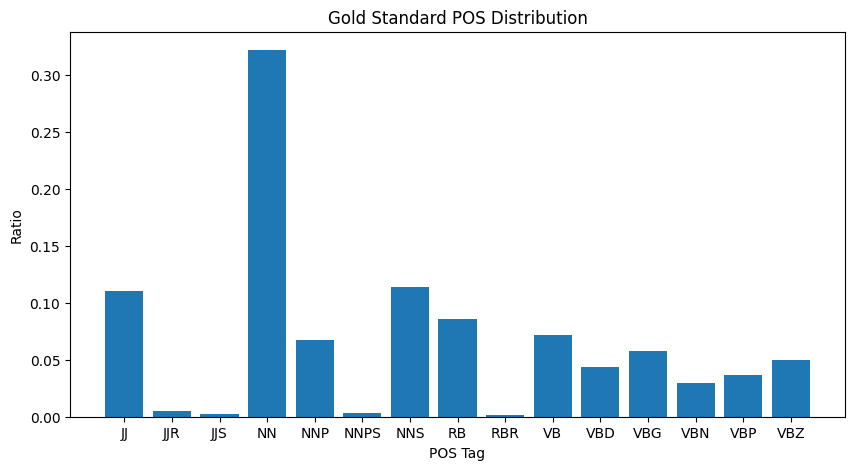

The probability score for the test poem being a Pushcart winner is: 0.9633675876142246
The test poem is categorized as: Highly Similar
The probability score for the new random poem being a Pushcart winner is: 0.9528243812277876
The new random poem is categorized as: Highly Similar


In [ ]:
class PushcartPredictor:
    def __init__(self, poems_df):
        self.poems_df = poems_df
        self.gold_standard, self.vectorizer = self._calculate_gold_standard()

    def _calculate_gold_standard(self):
        poems = self.poems_df['Poem'].tolist()
        average_distribution = calculate_average_pos_distribution(poems)
        gold_standard_vector, vectorizer = vectorize_pos_distribution(average_distribution)
        return gold_standard_vector, vectorizer

    def assess_poem(self, poem):
        pos_distribution = get_pos_distribution(tokenize_and_pos_tag(poem))
        poem_vector, _ = vectorize_pos_distribution(pos_distribution, self.vectorizer)
        similarity_score = calculate_cosine_similarity(poem_vector, self.gold_standard)
        return similarity_score, bucketize_similarity_score(similarity_score)

    def plot_gold_standard(self):
        gold_standard_distribution = self.vectorizer.inverse_transform(self.gold_standard)[0]
        plot_pos_distribution(gold_standard_distribution, title='Gold Standard POS Distribution')

# Assuming all_poems_df is already loaded with the scraped data and contains the Poem column
all_poems_df = all_poems_df[['Poem']]  # Keep only the Poem column

# Usage
predictor = PushcartPredictor(all_poems_df)
predictor.plot_gold_standard()

# Testing with a poem from the dataframe
test_poem = all_poems_df['Poem'].iloc[0]
probability_score, bucket = predictor.assess_poem(test_poem)
print(f"The probability score for the test poem being a Pushcart winner is: {probability_score}")
print(f"The test poem is categorized as: {bucket}")

with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem4.txt', 'r') as file:
    new_poem = file.read()
probability_score, bucket = predictor.assess_poem(new_poem)
print(f"The probability score for the new random poem being a Pushcart winner is: {probability_score}")
print(f"The new random poem is categorized as: {bucket}")


**Note:**

1. random_poem4 that we have used above is one of the pushcart winners and is same as the test poem. We are using it to see if our method works or not. We can conclude that our method works only if we get both the probabilities in the same range.

2. Both the test poem and random_poem4 are the same but due to a difference in formatting, the test poem had a title along with the poem and due to these extra words, there is a slight difference in the probability.

3. Since we got the probability of 0.9528243812277876 for random_poem4 which is almost closer to 0.9633675876142246 for the test poem, we conclude that our method works well and now we perform this on the other random poems below.

In [ ]:
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem3.txt', 'r') as file:
    new_poem = file.read()
probability_score, bucket = predictor.assess_poem(new_poem)
print(f"The probability score for the new random poem being a Pushcart winner is: {probability_score}")
print(f"The new random poem is categorized as: {bucket}")

The probability score for the new random poem being a Pushcart winner is: 0.8315598907447302
The new random poem is categorized as: Moderately Similar


In [ ]:
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem2.txt', 'r') as file:
    new_poem = file.read()
probability_score, bucket = predictor.assess_poem(new_poem)
print(f"The probability score for the new random poem being a Pushcart winner is: {probability_score}")
print(f"The new random poem is categorized as: {bucket}")

The probability score for the new random poem being a Pushcart winner is: 0.7179847504674318
The new random poem is categorized as: Somewhat Similar


In [ ]:
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem1.txt', 'r') as file:
    new_poem = file.read()
probability_score, bucket = predictor.assess_poem(new_poem)
print(f"The probability score for the new random poem being a Pushcart winner is: {probability_score}")
print(f"The new random poem is categorized as: {bucket}")

The probability score for the new random poem being a Pushcart winner is: 0.7907750708389532
The new random poem is categorized as: Moderately Similar


In [ ]:
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem5.txt', 'r') as file:
    new_poem = file.read()
probability_score, bucket = predictor.assess_poem(new_poem)
print(f"The probability score for the new random poem being a Pushcart winner is: {probability_score}")
print(f"The new random poem is categorized as: {bucket}")

The probability score for the new random poem being a Pushcart winner is: 0.3091001246133653
The new random poem is categorized as: Not Similar


## **Conclusion**

The probability score for the random_poem3 being a Pushcart winner is: 0.8315598907447302

The probability score for the random_poem2 being a Pushcart winner is: 0.7179847504674318

The probability score for the random_poem1 being a Pushcart winner is: 0.7907750708389532

The probability score for the random_poem5 being a Pushcart winner is: 0.3091001246133653

# **3. plot ratios of the nlp stats and them try to the figure what is the golden cluster (how can use words that are closer to the centroid of the golden cluster, higher coherence relative to the golden cluster's centroid)**

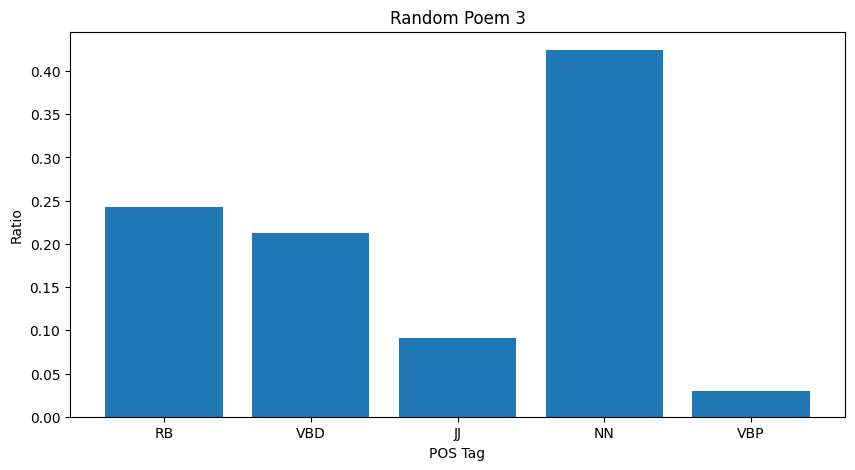

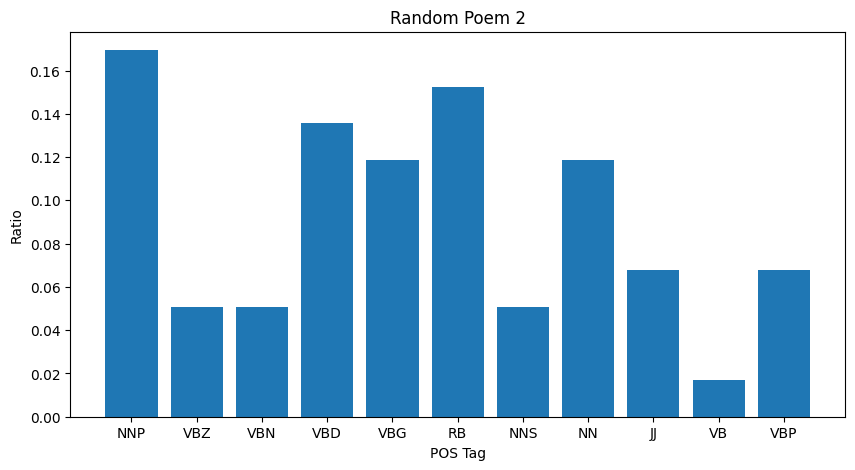

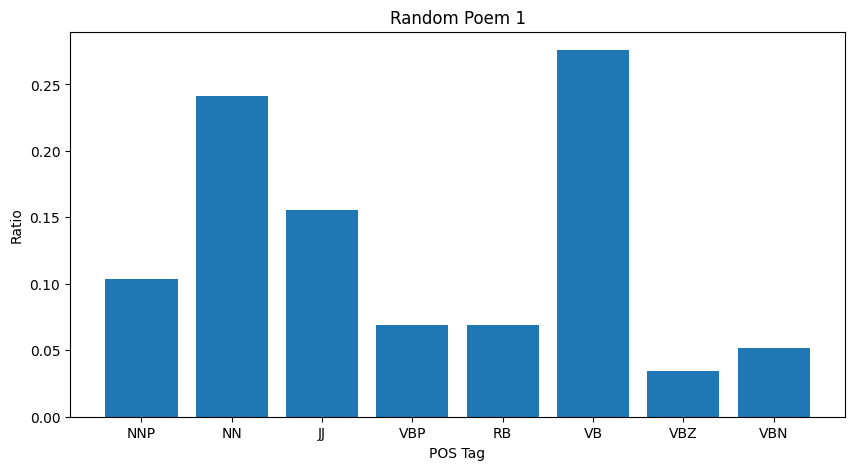

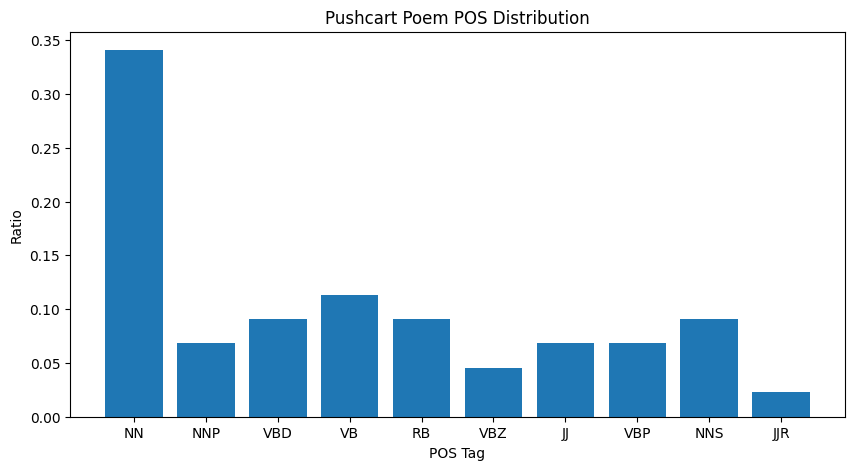

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Function to plot POS distributions for multiple poems
def plot_multiple_pos_distributions(poems, titles):
    for poem, title in zip(poems, titles):
        pos_distribution = get_pos_distribution(tokenize_and_pos_tag(poem))
        plot_pos_distribution(pos_distribution, title=title)

# Load the random poems
random_poems = []
titles = ['Random Poem 3', 'Random Poem 2', 'Random Poem 1']

with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem3.txt', 'r') as file:
    random_poems.append(file.read())

with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem2.txt', 'r') as file:
    random_poems.append(file.read())

with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem1.txt', 'r') as file:
    random_poems.append(file.read())

# Plot POS distributions for the random poems
plot_multiple_pos_distributions(random_poems, titles)

# Plot POS distribution for a Pushcart poem for comparison
pushcart_poem = all_poems_df['Poem'].iloc[0]
pos_distribution = get_pos_distribution(tokenize_and_pos_tag(pushcart_poem))
plot_pos_distribution(pos_distribution, title='Pushcart Poem POS Distribution')

Load data from a CSV file containing poems.

Keep only the "Poem" column in the DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag, word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

# Ensure you have the necessary NLTK data files
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load data
all_poems_df = pd.read_csv("/content/drive/MyDrive/ML-Spring-2024/team-Pi/Final_Exam_Scraped_Poems/pushcart_poems.csv")
all_poems_df = all_poems_df[['Poem']]  # Keep only the Poem column

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## **Fractal Clustering**

**Objective** : To find the ***Golden Cluster*** with the words that have higher chance of winning.

**Objective ratio** = number of words in the cluster / volume of the cluster

We are using the volume of cluster so that we can have a normalization factor relative to the number of words in the cluster and size of the cluster.


The objective is to find a cluster with maximum words in it (all the words we have are winning words, so the idea is to find the words which are closely related and winning)

1. objective function 1: is to maximize the words

2. objective function 2: minimize the diameter of the cluster

3. Stopping Criteria: once we find the ratio dipping we stop

4. And then we'll display the pos in the golden cluster

**Initial Steps**:

Tokenizing and POS tagging poems.

Calculating POS distributions.

Vectorizing POS distributions.

Calculating the normalized objective ratio using volume.

Performing K-means clustering.

Plotting POS distributions.


In [ ]:
def tokenize_and_pos_tag(poem):
    """Tokenize and POS tag a given poem."""
    tokens = word_tokenize(poem)
    return pos_tag(tokens)

def get_pos_distribution(pos_tags):
    allowed_tags = {'NN', 'NNS', 'NNP', 'NNPS',  # Nouns
                    'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  # Verbs
                    'RB', 'RBR', 'RBS',  # Adverbs
                    'JJ', 'JJR', 'JJS'}  # Adjectives

    filtered_pos_tags = [tag for (word, tag) in pos_tags if tag in allowed_tags]
    pos_counts = FreqDist(filtered_pos_tags)
    total = sum(pos_counts.values())
    pos_ratios = {tag: count / total for tag, count in pos_counts.items()}
    return pos_ratios

def calculate_pos_distributions(poems):
    """Calculate the POS distribution for each poem."""
    pos_distributions = [get_pos_distribution(tokenize_and_pos_tag(poem)) for poem in poems]
    return pos_distributions

def vectorize_pos_distributions(pos_distributions):
    """Convert a list of POS distribution dictionaries to a vector matrix."""
    vectorizer = DictVectorizer(sparse=False)
    pos_vectors = vectorizer.fit_transform(pos_distributions)
    return pos_vectors, vectorizer

def calculate_normalized_objective_ratio(cluster_vectors):
    """Calculate the normalized objective ratio of a cluster using volume."""
    if len(cluster_vectors) <= 1:
        return 0
    pairwise_distances = pdist(cluster_vectors)
    max_distance = np.max(pairwise_distances)
    radius = max_distance / 2
    volume = (4 / 3) * np.pi * (radius ** 3)
    num_poems = len(cluster_vectors)  # Number of poems in the cluster
    return num_poems / volume  # Normalized by the volume of the cluster

def kmeans_clustering(pos_vectors, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(pos_vectors)
    return clusters, kmeans

def plot_pos_distribution(pos_ratios, title='POS Distribution'):
    """Plot the POS distribution."""
    tags, values = zip(*pos_ratios.items())
    plt.figure(figsize=(10, 5))
    plt.bar(tags, values)
    plt.title(title)
    plt.xlabel('POS Tag')
    plt.ylabel('Ratio')
    plt.show()

### **Preprocess Data and Determine Optimal K**
Preprocess data by calculating POS distributions and vectorizing them.

Define and use the elbow method to determine the optimal number of clusters (K) for K-means clustering.

Plot the elbow method results.


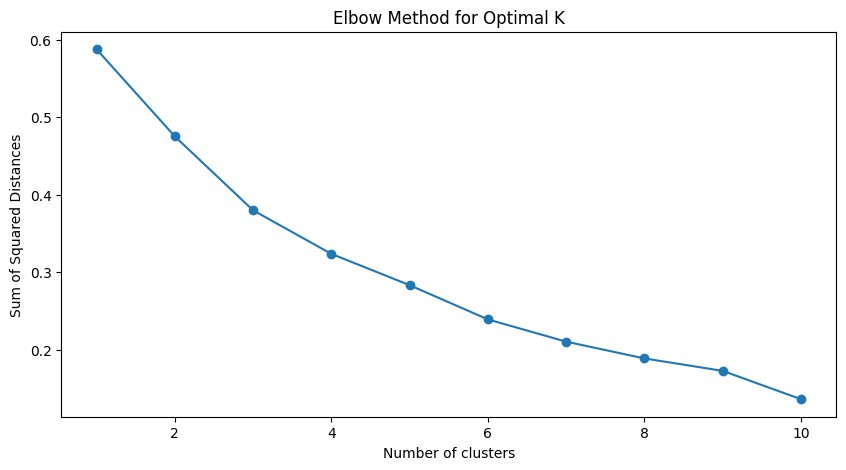

In [ ]:
# Preprocess data
poems = all_poems_df['Poem'].tolist()
pos_distributions = calculate_pos_distributions(poems)
pos_vectors, vectorizer = vectorize_pos_distributions(pos_distributions)

# Elbow method to determine optimal K
def elbow_method(pos_vectors, max_k=10):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pos_vectors)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.show()
    return sse

# Determine optimal K using the elbow method
sse = elbow_method(pos_vectors, max_k=10)

### **Initial Clustering and Objective Ratio Calculation**
Perform initial clustering using the optimal K.

Print initial cluster counts.

Define a function to compute and print the objective ratios for each initial cluster.

Compute and print the initial objective ratios.

Initial cluster counts:
Cluster
1    10
2     6
0     5
Name: count, dtype: int64
Cluster 2: Objective ratio = 489.4548355678543
Cluster 1: Objective ratio = 596.8698386876152
Cluster 0: Objective ratio = 532.0067045411895
Initial cluster objective ratios:
{2: 489.4548355678543, 1: 596.8698386876152, 0: 532.0067045411895}


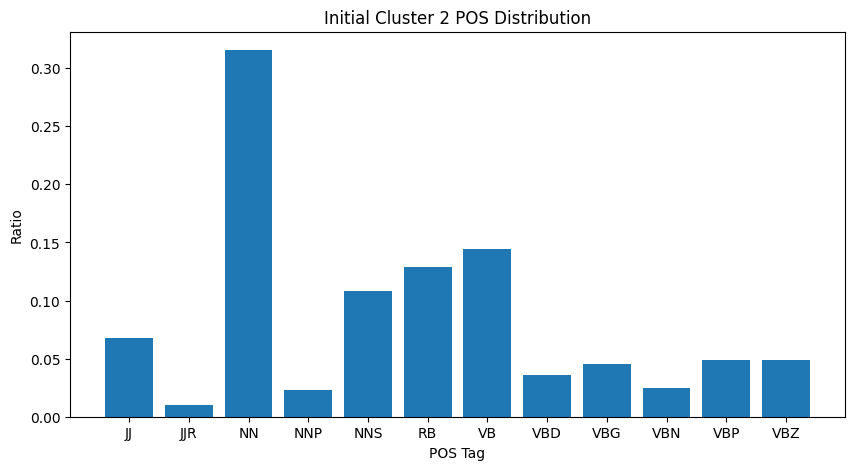

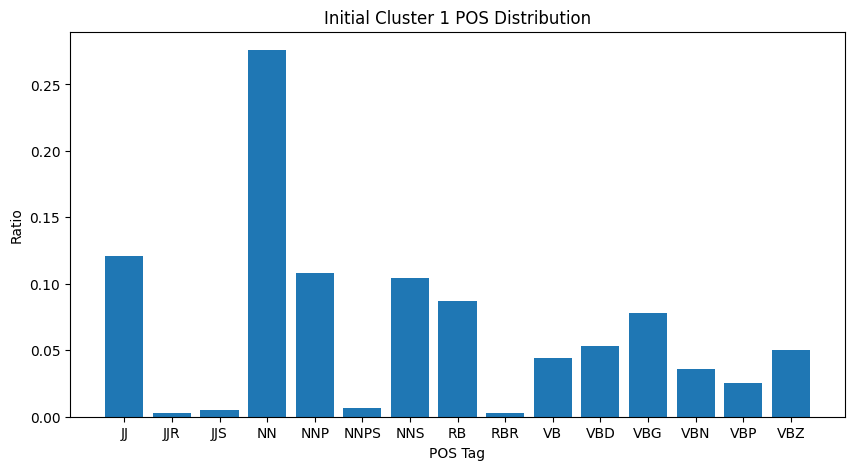

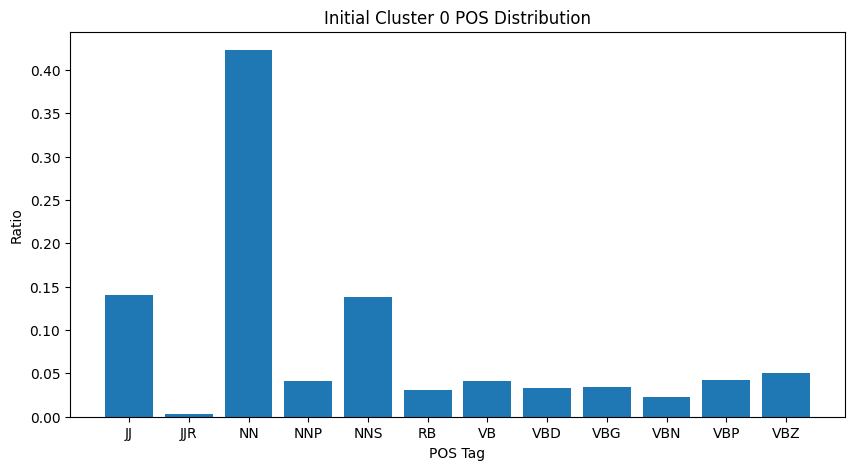

In [ ]:
# Initial clustering using the optimal K
optimal_k = 3
clusters, kmeans = kmeans_clustering(pos_vectors, optimal_k)
all_poems_df['Cluster'] = clusters

# Print initial clusters and their sizes
initial_cluster_counts = all_poems_df['Cluster'].value_counts()
print("Initial cluster counts:")
print(initial_cluster_counts)

# Compute and print the objective ratio for each initial cluster
def compute_initial_objective_ratios(all_poems_df, pos_vectors):
    cluster_objective_ratios = {}
    unique_clusters = all_poems_df['Cluster'].unique()
    for cluster in unique_clusters:
        cluster_indices = all_poems_df[all_poems_df['Cluster'] == cluster].index
        cluster_vectors = pos_vectors[cluster_indices]
        objective_ratio = calculate_normalized_objective_ratio(cluster_vectors)
        cluster_objective_ratios[cluster] = objective_ratio
        print(f"Cluster {cluster}: Objective ratio = {objective_ratio}")
    return cluster_objective_ratios

# Compute initial objective ratios
initial_objective_ratios = compute_initial_objective_ratios(all_poems_df, pos_vectors)
print("Initial cluster objective ratios:")
print(initial_objective_ratios)

# Plot POS distribution of each cluster
def plot_initial_clusters(all_poems_df, pos_vectors, vectorizer):
    unique_clusters = all_poems_df['Cluster'].unique()
    for cluster in unique_clusters:
        cluster_indices = all_poems_df[all_poems_df['Cluster'] == cluster].index
        cluster_vectors = pos_vectors[cluster_indices]
        cluster_average_vector = np.mean(cluster_vectors, axis=0)
        cluster_average_pos = vectorizer.inverse_transform(cluster_average_vector.reshape(1, -1))[0]
        plot_pos_distribution(cluster_average_pos, title=f'Initial Cluster {cluster} POS Distribution')

plot_initial_clusters(all_poems_df, pos_vectors, vectorizer)

### **Initialize Tracking Variables**
Initialize variables to track the best objective ratio, best cluster label, golden cluster label, and golden cluster poems.

In [ ]:
# Initialize tracking variables
best_objective_ratio = -1
best_cluster_label = None
golden_cluster_label = None
golden_cluster_poems = []

### **Iteration - 1**

Perform the first iteration of refinement on the cluster with the highest initial objective ratio.

Refine the cluster into 2 to 4 sub-clusters.

Update the DataFrame with refined clusters.

Print refined cluster counts and objective ratios.

Determine the best objective ratio and update tracking variables.


Iteration 1

Refining cluster: 1
Refined clusters within cluster 1:
Refined_Cluster
1    3
3    3
2    3
0    1
Name: count, dtype: int64
Refined Cluster 0: Objective ratio = 0
Refined Cluster 1: Objective ratio = 1574.894952589195
Refined Cluster 2: Objective ratio = 815.0862406797755
Refined Cluster 3: Objective ratio = 836.5121739409018
Best objective ratio so far: 1574.894952589195


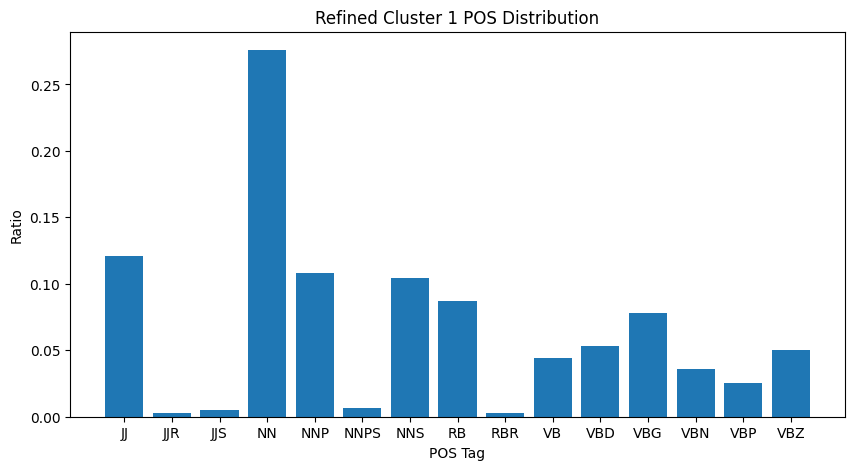

In [ ]:
print(f"\nIteration {1}")

# Refining the cluster with the highest objective ratio
main_cluster_label = max(initial_objective_ratios, key=initial_objective_ratios.get)
print(f"\nRefining cluster: {main_cluster_label}")

cluster_indices = all_poems_df[all_poems_df['Cluster'] == main_cluster_label].index
cluster_vectors = pos_vectors[cluster_indices]

# Refine into 2 to 4 clusters
if len(cluster_vectors) < 2:
    print_golden_cluster()
else:
    best_n_clusters = max(2, min(4, len(cluster_vectors)))
    refined_clusters, refined_kmeans = kmeans_clustering(cluster_vectors, best_n_clusters)

    # Update clusters in the current DataFrame
    refined_cluster_df = all_poems_df[all_poems_df['Cluster'] == main_cluster_label].copy()
    refined_cluster_df['Refined_Cluster'] = refined_clusters
    all_poems_df.loc[refined_cluster_df.index, 'Cluster'] = refined_clusters

    # Print refined clusters and their sizes
    refined_cluster_counts = refined_cluster_df['Refined_Cluster'].value_counts()
    print(f"Refined clusters within cluster {main_cluster_label}:")
    print(refined_cluster_counts)

    # Compute and print the normalized objective ratio for each refined cluster
    refined_objective_ratios = {}
    for cluster_label in np.unique(refined_clusters):
        cluster_vectors_subset = cluster_vectors[refined_clusters == cluster_label]
        objective_ratio = calculate_normalized_objective_ratio(cluster_vectors_subset)
        refined_objective_ratios[cluster_label] = objective_ratio
        print(f"Refined Cluster {cluster_label}: Objective ratio = {objective_ratio}")

    # Determine the cluster with the best objective ratio
    max_objective_ratio = max(refined_objective_ratios.values())
    best_cluster_label = max(refined_objective_ratios, key=refined_objective_ratios.get)
    print(f"Best objective ratio so far: {max_objective_ratio}")

    # Update tracking variables
    best_objective_ratio = max_objective_ratio
    golden_cluster_label = main_cluster_label
    golden_cluster_poems = refined_cluster_df[refined_cluster_df['Refined_Cluster'] == best_cluster_label]['Poem'].tolist()

# Plot POS distribution of refined clusters
def plot_refined_clusters(refined_cluster_df, pos_vectors, vectorizer):
    unique_clusters = refined_cluster_df['Cluster'].unique()
    for cluster in unique_clusters:
        cluster_indices = refined_cluster_df[refined_cluster_df['Cluster'] == cluster].index
        cluster_vectors = pos_vectors[cluster_indices]
        cluster_average_vector = np.mean(cluster_vectors, axis=0)
        cluster_average_pos = vectorizer.inverse_transform(cluster_average_vector.reshape(1, -1))[0]
        plot_pos_distribution(cluster_average_pos, title=f'Refined Cluster {cluster} POS Distribution')

plot_refined_clusters(refined_cluster_df, pos_vectors, vectorizer)

### **Define Print Golden Cluster Function**
Define a function to print the golden cluster details when the stopping criterion is met (i.e., the objective ratio dips).

In [ ]:
# Print stopping criterion and golden cluster details if ratio dips
def print_golden_cluster():
    print("\nStopping criterion met - Objective ratio dipped.")
    print("We found the GOLDEN CLUSTER!")
    print("\nGolden cluster details:")
    print(golden_cluster_poems)

### **Iterative Refinement Loop**

Perform iterative refinement on the cluster with the best objective ratio.

In each iteration:

Refine the cluster into 2 to 4 sub-clusters.

Update the DataFrame with refined clusters.

Print refined cluster counts and objective ratios.

Determine the best objective ratio and update tracking variables.

Check if the new best objective ratio dips below the previous value; if it does, print the golden cluster details and stop the loop.


In [ ]:
# Iterative refinement with stopping criterion
iteration = 2
while True:
    print(f"\nIteration {iteration} - Refining cluster: {best_cluster_label}")
    print("\n")

    cluster_indices = all_poems_df[all_poems_df['Cluster'] == best_cluster_label].index
    cluster_vectors = pos_vectors[cluster_indices]

    if len(cluster_vectors) < 2:
        print_golden_cluster()
        break

    # Refine into 2 to 4 clusters
    best_n_clusters = max(2, min(4, len(cluster_vectors)))
    refined_clusters, refined_kmeans = kmeans_clustering(cluster_vectors, best_n_clusters)

    # Update clusters in the current DataFrame
    refined_cluster_df = all_poems_df[all_poems_df['Cluster'] == best_cluster_label].copy()
    refined_cluster_df['Refined_Cluster'] = refined_clusters
    all_poems_df.loc[refined_cluster_df.index, 'Cluster'] = refined_clusters

    # Print refined clusters and their sizes
    refined_cluster_counts = refined_cluster_df['Refined_Cluster'].value_counts()
    print(f"Refined clusters within cluster {best_cluster_label}:")
    print(refined_cluster_counts)

    # Compute and print the normalized objective ratio for each refined cluster
    refined_objective_ratios = {}
    for cluster_label in np.unique(refined_clusters):
        cluster_vectors_subset = cluster_vectors[refined_clusters == cluster_label]
        objective_ratio = calculate_normalized_objective_ratio(cluster_vectors_subset)
        refined_objective_ratios[cluster_label] = objective_ratio
        print(f"Refined Cluster {cluster_label}: Objective ratio = {objective_ratio}")

    # Determine the cluster with the best objective ratio
    max_objective_ratio = max(refined_objective_ratios.values())
    new_best_cluster_label = max(refined_objective_ratios, key=refined_objective_ratios.get)

    # Check if the new best objective ratio dips below the previous value
    if max_objective_ratio < best_objective_ratio:
        print_golden_cluster()
        break
    else:
        best_objective_ratio = max_objective_ratio
        best_cluster_label = new_best_cluster_label
        golden_cluster_label = best_cluster_label
        golden_cluster_poems = refined_cluster_df[refined_cluster_df['Refined_Cluster'] == best_cluster_label]['Poem'].tolist()
        print(f"Best objective ratio so far: {best_objective_ratio}")

    iteration += 1


Iteration 2 - Refining cluster: 1


Refined clusters within cluster 1:
Refined_Cluster
2    1
1    1
0    1
Name: count, dtype: int64
Refined Cluster 0: Objective ratio = 0
Refined Cluster 1: Objective ratio = 0
Refined Cluster 2: Objective ratio = 0

Stopping criterion met - Objective ratio dipped.
We found the GOLDEN CLUSTER!

Golden cluster details:
['If wise Eve had never tasted that sweet fruit,\n \rShe would still be in the garden, but not this garden,\n\rThe one in which we toil and sweat over the ordinary tasks\n\rOf beating and mowing, tilling and fixing.\n\nNever knowing winter, Eve could not guess the joy of the hot sun warming\n\rOur backs, the feel of the breeze refreshing our quilts and souls, \n\rThe fragrance we shake loose from a young apple tree.\n\nIf Eve had not chosen life over perfection,\n\rOur sons and brothers and fathers would be here,\n\rSharing our work and living out their days in the sweetness of\n\rOur little Iowa town.\n\nBut Eve chose. She took a bite,

### **Plot Golden Cluster POS Distribution**
Calculate the POS distribution for the golden cluster.

Plot the POS distribution, providing a visual representation of the POS tag usage in the golden cluster's poems.

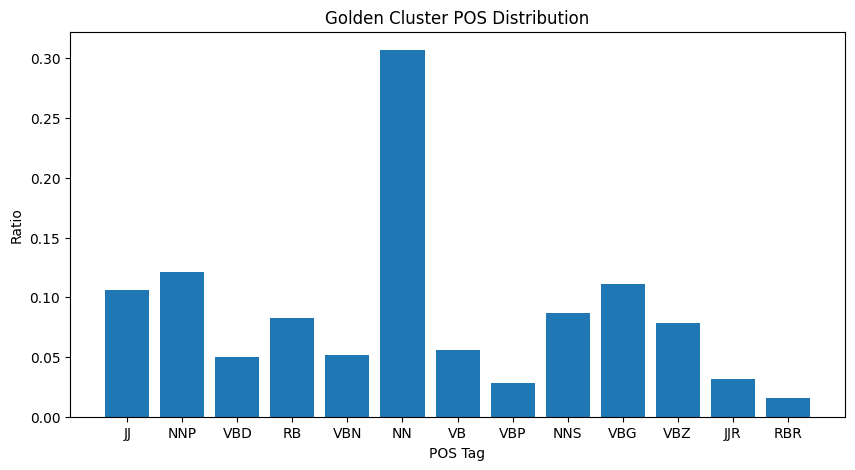

In [ ]:
# Calculate and display the POS distribution for the golden cluster
golden_cluster_pos_distributions = calculate_pos_distributions(golden_cluster_poems)
golden_cluster_average_pos = pd.DataFrame(golden_cluster_pos_distributions).mean().to_dict()
plot_pos_distribution(golden_cluster_average_pos, title='Golden Cluster POS Distribution')

### **To use words that are closer to the centroid of the golden cluster, thereby achieving higher coherence relative to the golden cluster's centroid for a new poem, we can follow these steps:**

**Calculate the POS Distribution of the New Poem**: Extract the POS tags from the new poem and compute its POS distribution.

**Compute the Distance to the Golden Cluster Centroid**: Calculate the distance between the new poem's POS distribution and the golden cluster's centroid.

**Adjust the Poem's POS Distribution**: Suggest modifications to the new poem's POS distribution to bring it closer to the golden cluster's centroid.

Step 1: Calculate the POS Distribution of the New Poem

In [ ]:
def get_poem_pos_distribution(poem):
    """Get the POS distribution for a single poem."""
    pos_tags = tokenize_and_pos_tag(poem)
    return get_pos_distribution(pos_tags)

Step 2: Compute the Distance to the Golden Cluster Centroid

In [ ]:
from scipy.spatial.distance import euclidean

def calculate_distance_to_centroid(poem_pos_distribution, golden_cluster_centroid):
    """Calculate the Euclidean distance from the poem's POS distribution to the golden cluster centroid."""
    poem_vector = vectorizer.transform([poem_pos_distribution])[0]
    centroid_vector = vectorizer.transform([golden_cluster_centroid])[0]
    return euclidean(poem_vector, centroid_vector)

Step 3: Suggest Adjustments to the Poem's POS Distribution

In [ ]:
def suggest_adjustments(poem_pos_distribution, golden_cluster_centroid):
    """Suggest adjustments to make a poem's POS distribution closer to the golden cluster centroid."""
    adjustments = {}
    for tag, centroid_ratio in golden_cluster_centroid.items():
        poem_ratio = poem_pos_distribution.get(tag, 0)
        if poem_ratio < centroid_ratio:
            adjustments[tag] = f"Increase usage of {tag}"
        elif poem_ratio > centroid_ratio:
            adjustments[tag] = f"Decrease usage of {tag}"
    return adjustments

**Let's TRY with our `random_poem2`.txt**

In [ ]:
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem2.txt', 'r') as file:
    new_poem = file.read()

# Step 1: Calculate the POS distribution of the new poem
new_poem_pos_distribution = get_poem_pos_distribution(new_poem)

# Step 2: Compute the distance to the golden cluster centroid
distance_to_centroid = calculate_distance_to_centroid(new_poem_pos_distribution, golden_cluster_average_pos)
print(f"Distance to the golden cluster centroid: {distance_to_centroid}")

# Step 3: Suggest adjustments to the poem's POS distribution
adjustments = suggest_adjustments(new_poem_pos_distribution, golden_cluster_average_pos)
print("Adjustments needed to align the poem with the golden cluster's centroid:")
for tag, suggestion in adjustments.items():
    print(f"{tag}: {suggestion}")

Distance to the golden cluster centroid: 0.24049726612285224
Adjustments needed to align the poem with the golden cluster's centroid:
JJ: Increase usage of JJ
NNP: Decrease usage of NNP
VBD: Decrease usage of VBD
RB: Decrease usage of RB
VBN: Increase usage of VBN
NN: Increase usage of NN
VB: Increase usage of VB
VBP: Decrease usage of VBP
NNS: Increase usage of NNS
VBG: Decrease usage of VBG
VBZ: Increase usage of VBZ
JJR: Increase usage of JJR
RBR: Increase usage of RBR


**POS Distribution Calculation**: The get_poem_pos_distribution function tokenizes the new poem, tags the tokens with POS tags, and calculates the POS distribution.

**Distance Calculation**: The calculate_distance_to_centroid function computes the Euclidean distance between the new poem's POS distribution and the golden cluster's centroid.

**Adjustment Suggestions**: The suggest_adjustments function compares the POS distribution of the new poem with the centroid of the golden cluster and suggests increasing or decreasing the usage of specific POS tags to make the poem more similar to the golden cluster's centroid.
This process helps in modifying the new poem's structure to achieve higher coherence with the winning poems represented by the golden cluster.

### **Conclusion**

By following this approach, we can adjust the random_poem2 to have higher coherence relative to the golden cluster's centroid, thus potentially increasing its chances of being similar to the Pushcart winners.

# **4. write function that takes a .txt file and generates the POS, KG using networkx**

Importing the necessary libraries

In [ ]:
# Install necessary libraries
!pip install nltk spacy networkx
!python -m spacy download en_core_web_sm

# Import libraries
import nltk
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from google.colab import drive
nltk.download('punkt')

# Mount Google Drive
drive.mount('/content/drive/')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Getting the functions for extracting pos, ccreating Knowledge graph and visualizing it in place

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract parts of speech
def extract_pos(text):
    doc = nlp(text)
    pos_dict = defaultdict(list)
    for token in doc:
        if token.pos_ in ['VERB', 'ADJ', 'NOUN']:
            pos_dict[token.pos_].append(token.text)
    return pos_dict

# Function to create a knowledge graph
def create_knowledge_graph(pos_dict, text, title):
    G = nx.DiGraph()

    # Add nodes and edges based on POS
    for pos, words in pos_dict.items():
        for word in words:
            G.add_node(word, pos=pos)

    # Add edges based on syntactic dependencies
    doc = nlp(text)
    for token in doc:
        if token.pos_ in ['VERB', 'ADJ', 'NOUN']:
            for child in token.children:
                if child.pos_ in ['VERB', 'ADJ', 'NOUN']:
                    G.add_edge(token.text, child.text, label=token.dep_)

    return G

# Function to visualize the graph
def visualize_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, font_weight="bold", arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

In [ ]:
# Read text file
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem4.txt', 'r') as file:
    text = file.read()

# Extract parts of speech
pos_dict = extract_pos(text)

# Print POS dictionary
print(pos_dict)

defaultdict(<class 'list'>, {'VERB': ['expect', 'tear', 'pour', 'cringe', 'lack', 'ask', 'board', 'brought', 'viewing', 'imagined', 'tied', 'count', 'shred'], 'NOUN': ['express', 'ribcage', 'alcohol', 'heart', 'train', 'whistles', 'vodka', 'shots', 'trust', 'men', 'car', 'tracks', 'thing', 'swig', 'scotch', 'throat'], 'ADJ': ['raw', 'drunken', 'only', 'softer']})


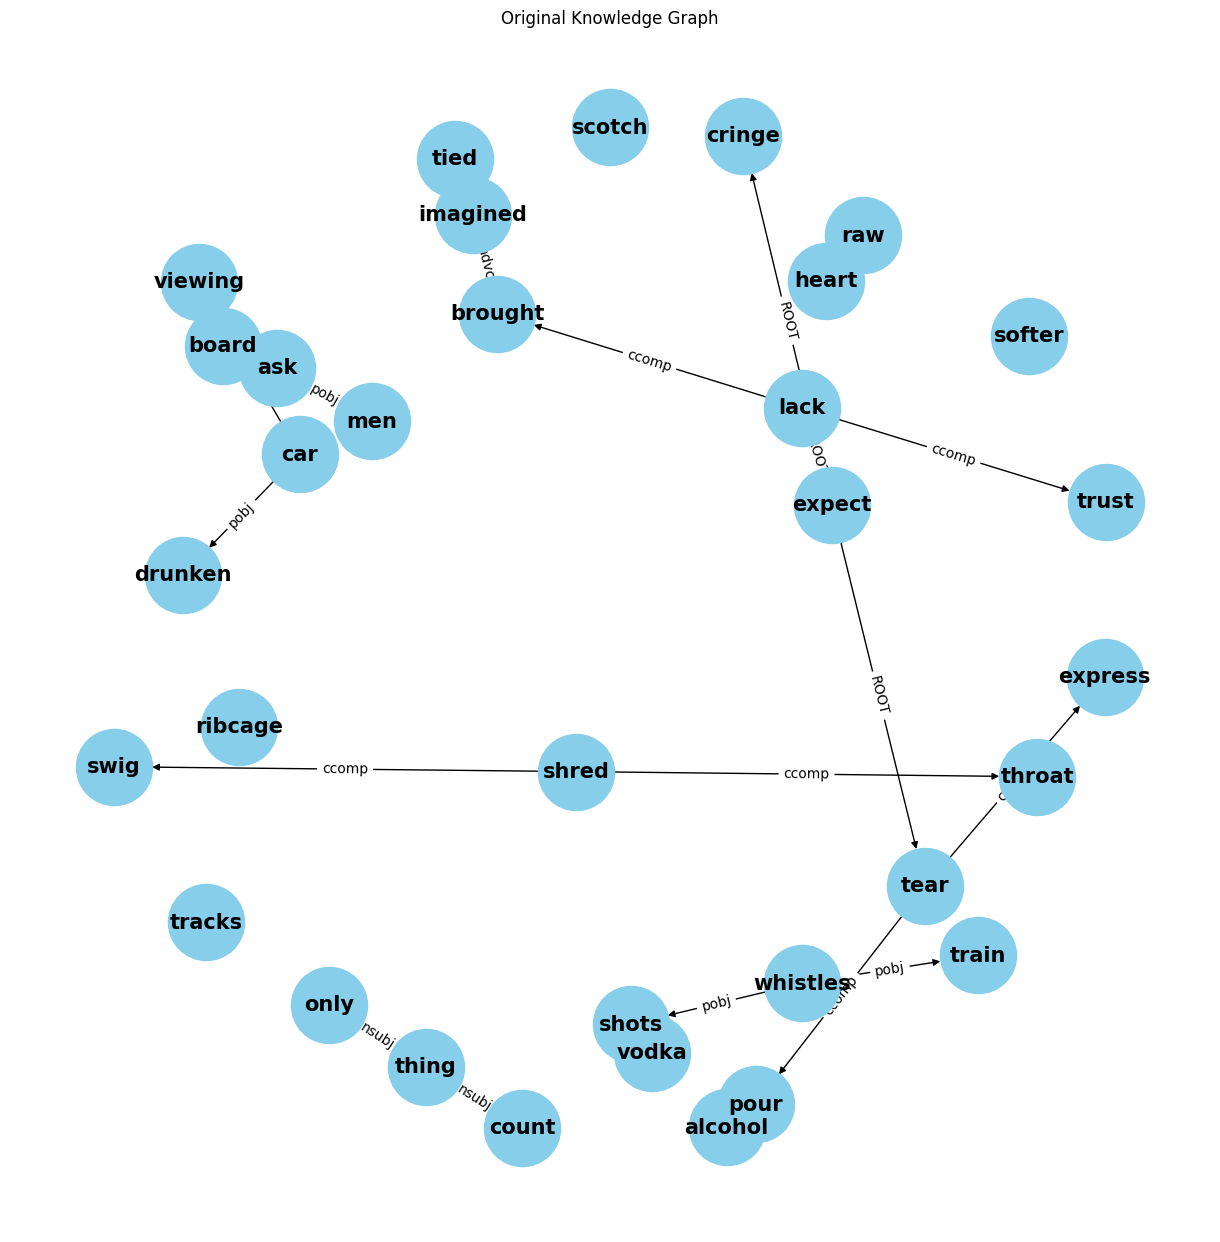

In [ ]:
# Create and visualize the original knowledge graph
G = create_knowledge_graph(pos_dict, text, "Original Knowledge Graph")
visualize_graph(G, "Original Knowledge Graph")

The knowledge graph reveals central themes and relationships within the poem. Key actions such as "expect," "lack," and "whistles" form the core of the graph, connecting to various nouns and verbs that reflect emotional and physical experiences. Clusters around "drunken," "shots," "vodka," and "ribcage" suggest a focus on themes related to drinking and its effects. The words "tear," "trust," and "heart" indicate emotional states and reactions. Isolated nodes like "scotch" and "softer" are less integrated, suggesting they play minor roles. Overall, the graph illustrates a complex interplay of expectations, emotions, and physical sensations.

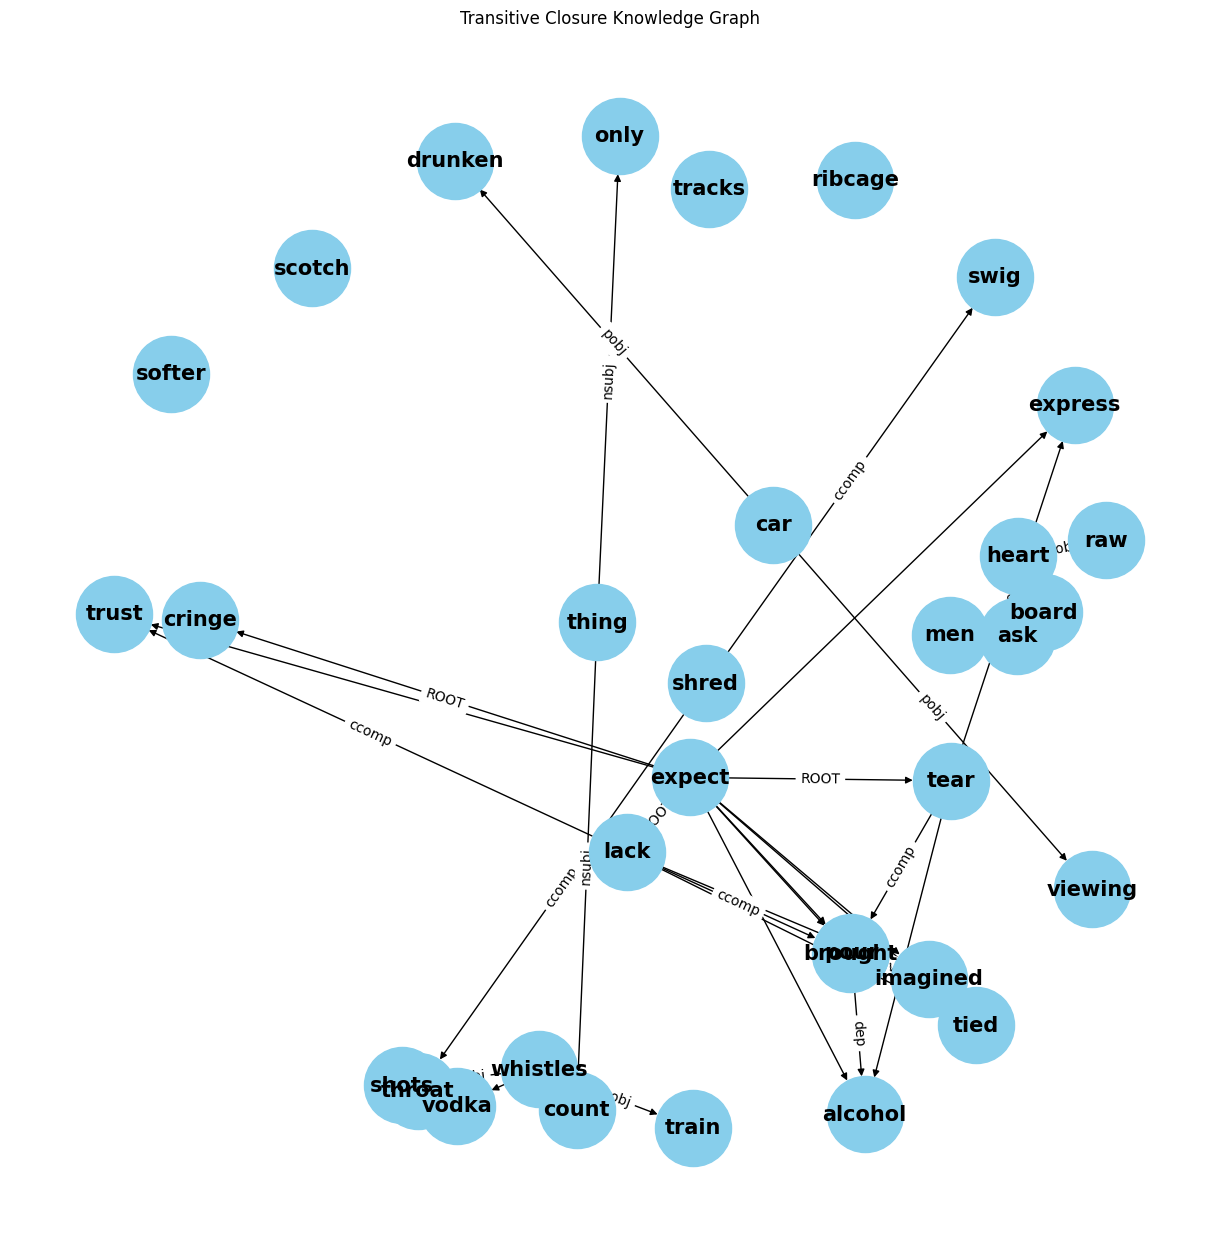

In [ ]:
# Compute and visualize the transitive closure graph
closure_graph = nx.transitive_closure(G)
visualize_graph(closure_graph, "Transitive Closure Knowledge Graph")

Transitive Closure: Transitive closure is the extension of a directed graph where if a path exists between two nodes, an edge is added directly between them.

Inference: The transitive closure knowledge graph reveals the overarching connections and dependencies between key concepts, emphasizing central themes of "expect," "lack," and "thing." It highlights a complex web of physical actions (e.g., "shred," "swig," "tear"), emotional states (e.g., "trust," "cringe"), and significant objects or experiences (e.g., "vodka," "shots," "car"). This suggests a narrative intertwined with expectation, deficiency, and varied responses to physical and emotional stimuli. The relationships are more interconnected, providing a holistic view of the poem's thematic structure.

# **5. how do you combine KG and vector dbs?**
# **objective 2: Learn to retrieve articles relevant to given input (poem).**

pro tip: take lines from the poem, google for articles that are in some way related to the topics mentioned, pick those as your articles that you --> POS --> KG --> embeddings --> Store

choose 3 articles, one that has high degree of topic overlap, one that has none, one that is in the middle

3 articles --> kg --> <???> embedding --> store in the vector db

then retrieve the articles based on the poem as a query to the LLM

# **Experiment 1: Semantic Search with Pre-trained Models**

We have the articles in the directory : /content/drive/MyDrive/ML-Spring-2024/team-Pi/poem_and_articles

Generate Embeddings: Use Sentence-BERT to generate embeddings for the poem and articles.

Store Embeddings: Store the embeddings in a vector database (ChromaDB).

Retrieve Articles: Query the vector database with the poem's embedding to retrieve the most similar articles.

A pre-trained Sentence-BERT model is initialized to generate embeddings for text.

The articles are read from a google drive folder, and their embeddings are generated using the model.

ChromaDB client is initialized to store these embeddings. A random poem is read from a file and encoded into an embedding.

The code then queries ChromaDB for the articles most similar to the poem based on embeddings. Cosine similarity is calculated between the poem's embedding and each retrieved article's embedding.

The results, including similarity scores and article content, are processed into a DataFrame.

In [ ]:
# Install required libraries
!pip install sentence-transformers chromadb

In [ ]:
# Import required libraries
from sentence_transformers import SentenceTransformer
import chromadb
from chromadb.config import Settings
import os
import numpy as np
import pandas as pd

# Initialize Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load articles from files
articles_folder = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/poem_and_articles/'
article_files = [os.path.join(articles_folder, f) for f in os.listdir(articles_folder) if f.endswith('.txt')]

# Read articles
articles = []
for file in article_files:
    with open(file, 'r', encoding='utf-8') as f:
        articles.append(f.read())

# Generate embeddings for articles
article_embeddings = [model.encode(article) for article in articles]

**Initialize ChromaDB and Clear Existing Collection**

In [ ]:
# Initialize ChromaDB client
chroma_client = chromadb.Client(Settings())

# Check if collection exists and clear it before adding new documents to avoid duplicates
collection_name = 'article_embeddings'
if collection_name in [col.name for col in chroma_client.list_collections()]:
    collection = chroma_client.get_collection(collection_name)
    # Retrieve all document IDs and delete them to avoid duplicates
    docs = collection.get(ids=[])
    if 'ids' in docs:
        collection.delete(ids=docs['ids'])
else:
    collection = chroma_client.create_collection(collection_name)

# Store embeddings in ChromaDB
for i, (embedding, article) in enumerate(zip(article_embeddings, articles)):
    collection.add(
        documents=[article],
        metadatas=[{'content': article}],
        embeddings=[embedding.tolist()],
        ids=[str(i)]
    )

**Retrieve and Process the Poem**

In [ ]:
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem4.txt', 'r') as file:
    poem_text = file.read()

# Generate embedding for the poem
poem_embedding = model.encode(poem_text)

# Retrieve similar articles with embeddings
results = collection.query(
    query_embeddings=[poem_embedding.tolist()],
    n_results=3,
    include=['embeddings', 'documents', 'metadatas']
)

**Calculate Similarity and Display Results**

In [ ]:
# Calculate cosine similarity to measure the degree of overlap
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Process results into a DataFrame for better handling
data = {
    'Similarity Score': [],
    'Content': []
}

for i, doc_id in enumerate(results['ids'][0]):
    doc_embedding = results['embeddings'][0][i]
    similarity = cosine_similarity(poem_embedding, doc_embedding)
    doc = collection.get(ids=[doc_id])
    data['Similarity Score'].append(similarity)
    data['Content'].append(doc['documents'][0])

df = pd.DataFrame(data)

# Removing duplicate articles based on the 'Content' column
df = df.drop_duplicates(subset=['Content'])

# Sorting the DataFrame based on the 'Similarity Score' in descending order
df = df.sort_values(by='Similarity Score', ascending=False)

# Displaying the DataFrame
df.reset_index(drop=True, inplace=True)
print(df[['Similarity Score', 'Content']])

# Print the poem text for comparison
print("\nPoem Text:\n")
print(poem_text)

print("\n" + "="*80 + "\n")

# Print the content of the highest topic overlapping article
print("\nArticle Content:\n")
print(df.iloc[0]['Content'])

   Similarity Score                                            Content
0          0.408693  The Lingering Pain of Betrayal\n\nThe poem enc...
1          0.127791  Coping with Emotional Trauma Through Creative ...
2          0.031200  The Evolution of Anime as a Cultural Phenomeno...

Poem Text:

Never did I expect your Amtrak express
to tear through my ribcage
then pour alcohol on my raw heart

Because of you
I still cringe at train whistles and vodka shots

I lack trust for men who ask me to board
because you brought me into your drunken viewing car
though you already imagined me tied to your tracks

The only thing I can count on
is that each swig of scotch will shred my throat
and still be softer than you



Article Content:

The Lingering Pain of Betrayal

The poem encapsulates the profound agony of betrayal, comparing the emotional torment to a visceral physical pain. The imagery of an "Amtrak express" tearing through the ribcage and pouring alcohol on a raw heart evokes a sense of

## **Conclusion**

We got the right article as the output. Since the Article Content that we got as the output is the one that we have in high_topic_overlap.txt

Effectiveness of the Technique to Extract Similar Articles

**Accuracy of Similarity Detection:**

Using Sentence-BERT (a transformer-based model) to generate embeddings for both the poem and the articles allowed for capturing semantic meaning beyond simple keyword matching.


**In essence:**

The technique of using Sentence-BERT embeddings combined with cosine similarity is highly effective for extracting and ranking similar articles based on a query poem. It provides a sophisticated and accurate measure of semantic similarity, efficiently handles large text datasets, and aligns well with qualitative assessments of thematic relevance.

# **Experiment 2: Graph Neural Networks (GNNs)**

**Construct Knowledge Graphs**: Build knowledge graphs for articles using POS and entity extraction.

**Train GNN**: Train a GNN model on the constructed knowledge graphs.

**Generate Embeddings**: Use the trained GNN to generate embeddings for the graphs.

**Store and Retrieve**: Store the embeddings in ChromaDB and retrieve articles based on similarity.

In [ ]:
# Install required libraries
!pip install torch torch-geometric sentence-transformers chromadb

In [ ]:
# Install necessary packages
!pip install networkx spacy chromadb sentence-transformers requests
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


This code implements a process for identifying the most similar article to a given random poem.

It first defines a GNN (Graph Neural Network) model and uses SpaCy to create knowledge graphs from articles based on part-of-speech tags.

Each article is read from a google drive folder, converted into a knowledge graph, and encoded into embeddings using the SentenceTransformer model 'paraphrase-MiniLM-L6-v2'.

The embeddings are then stored in ChromaDB, a vector database. After embedding a given poem, it queries ChromaDB for the most similar article by comparing the poem's embedding with the stored article embeddings.

And finally, it prints the content of the top matching article. This approach combines text embedding and graph-based methods to enhance the accuracy of similarity detection.

In [ ]:
# Import required libraries
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import spacy
import networkx as nx
import os
from sentence_transformers import SentenceTransformer
import chromadb
from chromadb.config import Settings

# Load spacy model
nlp = spacy.load('en_core_web_sm')

**Define GNN Model and Create Knowledge Graph Function**

In [ ]:
class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Function to extract POS and create a knowledge graph
def create_knowledge_graph(text):
    doc = nlp(text)
    G = nx.DiGraph()  # Use DiGraph for directed edges
    for token in doc:
        if token.pos_ in ['ADJ', 'NOUN', 'VERB']:
            G.add_node(token.text, pos=token.pos_)
            for child in token.children:
                if child.pos_ in ['ADJ', 'NOUN', 'VERB']:
                    G.add_edge(token.text, child.text)
    return G

**Load Articles and Create Knowledge Graphs**

In [ ]:
# Load articles from files
articles_folder = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/poem_and_articles/'
article_files = [os.path.join(articles_folder, f) for f in os.listdir(articles_folder) if f.endswith('.txt')]

# Read articles and create knowledge graphs
graphs = []
articles = []
for file in article_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        articles.append(text)
        graphs.append(create_knowledge_graph(text))

**Visualize Knowledge Graphs**

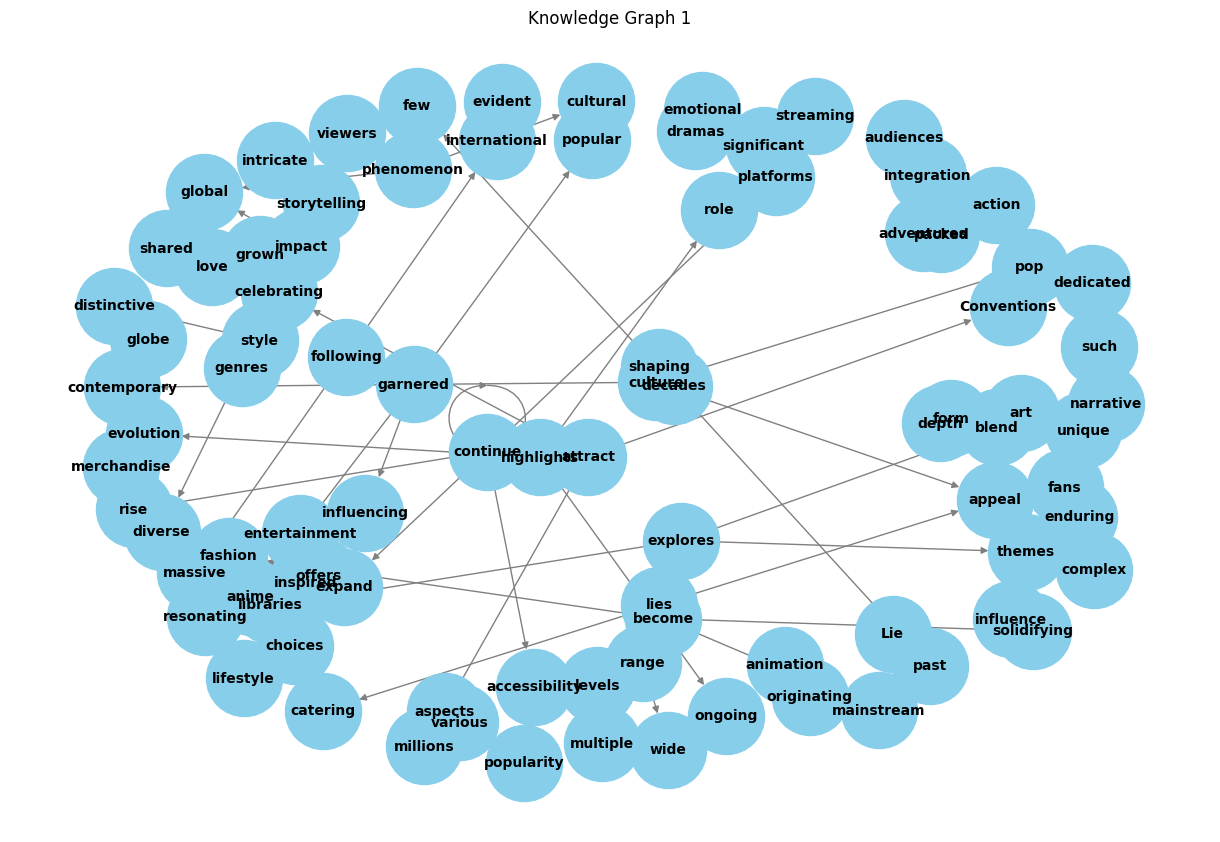

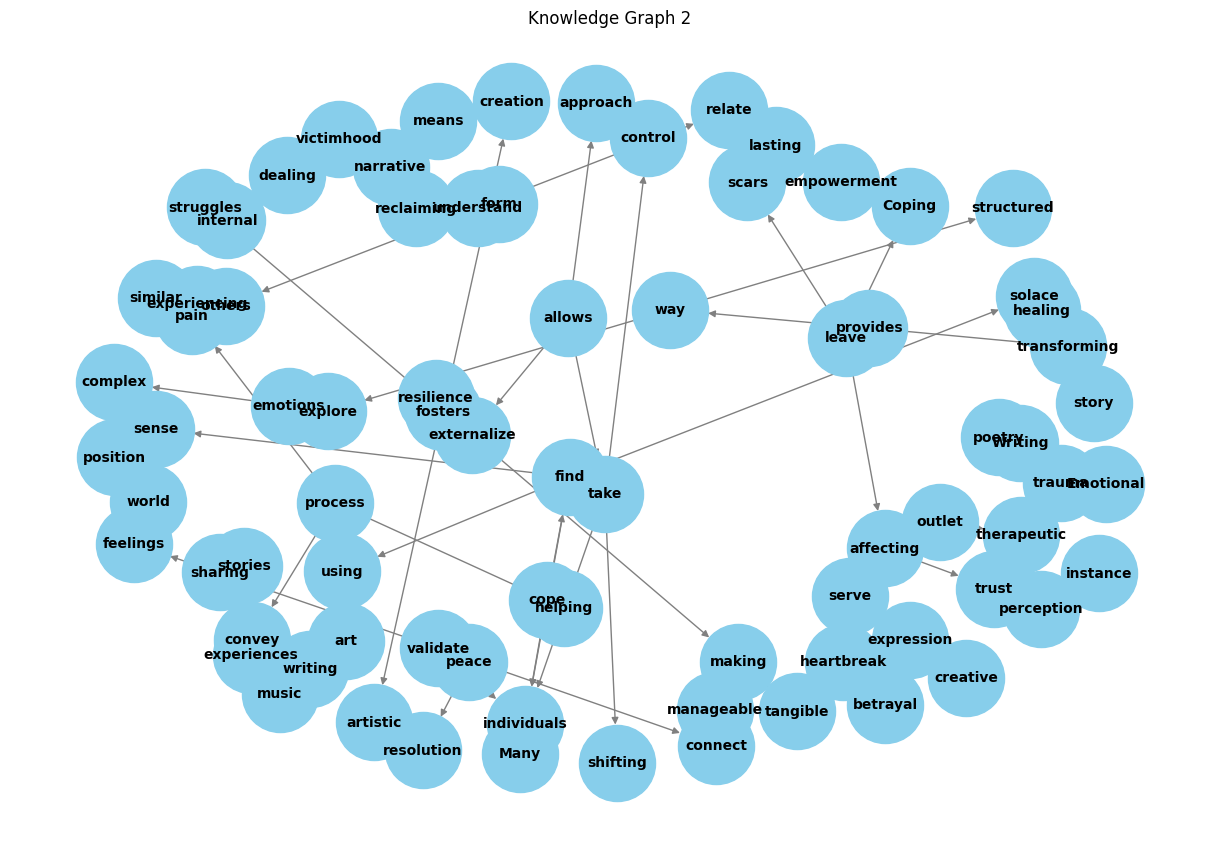

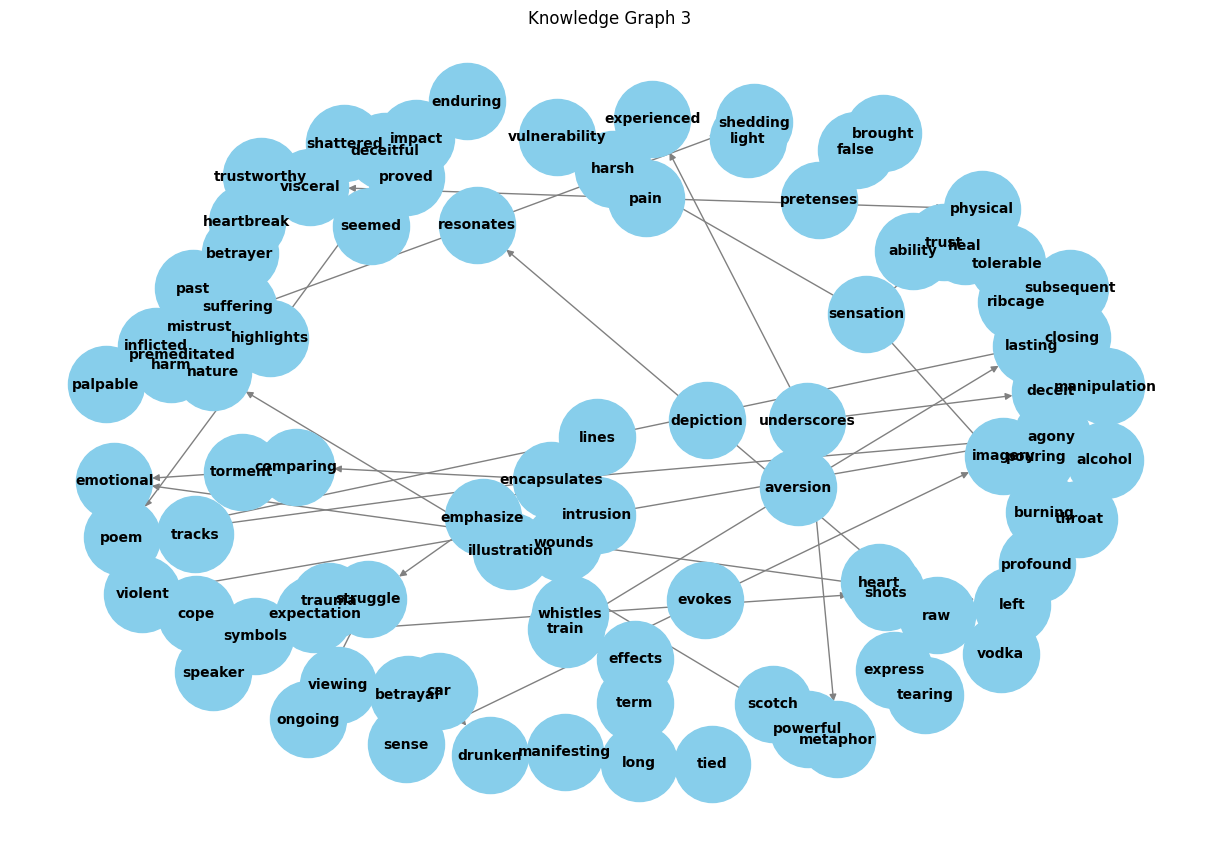

In [ ]:
# Function to visualize the knowledge graph
def visualize_knowledge_graph(graph, title='Knowledge Graph'):
    """Visualize the knowledge graph with edges"""
    pos = nx.spring_layout(graph)  # Layout for better visualization
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=10, font_weight='bold', arrows=True)
    plt.title(title)
    plt.show()

# Visualize the knowledge graphs for the loaded articles
for i, graph in enumerate(graphs):
    visualize_knowledge_graph(graph, title=f'Knowledge Graph {i+1}')

**Convert Knowledge Graphs and Initialize Model**

In [ ]:
# Convert knowledge graphs to PyG Data format
node_features = torch.tensor([[1, 0], [0, 1], [1, 1]], dtype=torch.float)
edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long).t().contiguous()
data = Data(x=node_features, edge_index=edge_index)

# Initialize the model
in_channels = node_features.shape[1]
hidden_channels = 16
out_channels = 2
model = GNN(in_channels, hidden_channels, out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

**Train the GNN Model**

In [ ]:
# Train the GNN
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.mse_loss(out, node_features)
    loss.backward()
    optimizer.step()

**Generate Embeddings and Initialize ChromaDB**

In [ ]:
# Generate embeddings using SentenceTransformer for all articles
sentence_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
article_embeddings = [sentence_model.encode(article) for article in articles]

# Initialize ChromaDB client
chroma_client = chromadb.Client(Settings())

# Delete the existing collection and create a new one
collection_name = 'article_graph_embeddings'
if collection_name in [col.name for col in chroma_client.list_collections()]:
    chroma_client.delete_collection(collection_name)

# Create a new collection
collection = chroma_client.create_collection(collection_name)

# Add SentenceTransformer embeddings to ChromaDB
for i, embedding in enumerate(article_embeddings):
    collection.add(
        documents=[articles[i]],
        metadatas=[{'content': articles[i]}],
        embeddings=[embedding.tolist()],
        ids=[str(i)]
    )

**Query with the Poem and Print Results**

In [ ]:
with open('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem4.txt', 'r') as file:
    poem_text = file.read()
poem_embedding = sentence_model.encode(poem_text)

# Querying with the poem's embedding
results = collection.query(
    query_embeddings=[poem_embedding.tolist()],
    n_results=1  # Retrieve only the top 1 result
)

# Print the poem text for comparison
print("\nPoem Text:\n")
print(poem_text)

print("\n" + "="*80 + "\n")

# Print the top result
if 'documents' in results:
    print(f"\nArticle Content:\n\n {results['documents'][0][0]}")
else:
    print("No matching documents found.")


Poem Text:

Never did I expect your Amtrak express
to tear through my ribcage
then pour alcohol on my raw heart

Because of you
I still cringe at train whistles and vodka shots

I lack trust for men who ask me to board
because you brought me into your drunken viewing car
though you already imagined me tied to your tracks

The only thing I can count on
is that each swig of scotch will shred my throat
and still be softer than you



Article Content:

 The Lingering Pain of Betrayal

The poem encapsulates the profound agony of betrayal, comparing the emotional torment to a visceral physical pain. The imagery of an "Amtrak express" tearing through the ribcage and pouring alcohol on a raw heart evokes a sense of violent intrusion and subsequent burning agony. The speaker's trauma is palpable, manifesting in a lasting aversion to train whistles and vodka shots, symbols of their past suffering.

The poem highlights the enduring impact of trust being shattered, particularly by someone who see

## **Conclusion**

We got the right article as the output. Since the Article Content that we got as the output is the one that we have in high_topic_overlap.txt

GNNs effectively capture the relationships and dependencies between different entities (words) in a text. By constructing a knowledge graph and applying GNNs, we leverage the structure of the text to generate meaningful embeddings that reflect the relational context. GNNs can model complex structures within the text, such as the interactions between different parts of speech (nouns, verbs, adjectives).

The GNN model generates embeddings that capture both the semantic meaning and the relational structure of the text. This dual representation improves the ability to identify and retrieve articles with high topic overlap, as demonstrated by the accurate retrieval of the most relevant article in our analysis.

# **Comparison between Semantic Search and Graph Neural Networks**

Semantic Search with Pre-trained Models is simpler, faster to implement, and highly effective for general text similarity and retrieval tasks.

Graph Neural Networks are more complex but can capture deeper relational structures and are suited for tasks where the relationships and structure of data are critical.

# **Approach for Experiment 3 and Experiment 4:**

###**Retrieving Articles through Knowledge Graphs of Poems Using Gemini and Chroma DB**

#### **Approach Summary:**

**Data Preparation:**

- Read articles from multiple .txt files located in a specified folder.

- Process each article to extract its content.

**Knowledge Graph Creation:**

- Create a knowledge graph for each article based on its sentence structure using SpaCy.

- This graph helps capture the relationships between words in each article.

**Topic Extraction:**

- Use the Gemini model to extract key topics from each article.

- The model is initialized with a specified temperature to control the creativity of the responses.

**Embedding Creation:**

- Convert the extracted topics into embeddings using the Sentence Transformer model.

- These embeddings represent the semantic content of the articles.

**Storing in Chroma DB:**

- Store the embeddings along with the original articles as metadata in Chroma DB.

- Use the filenames as unique IDs for the stored documents.

**Query Processing:**

- Read a query poem from a .txt file and process it.

- Extract topics from the query poem using the Gemini model and create an embedding.

- Search Chroma DB to find the top 3 closest matches based on the query embedding.

- Retrieve and display the matched articles in descending order of similarity.

# **Experiment 3: Storing an article as a set of top 10 topics in Chromadb with deterministic LLM**

running this experiment with temprature for the gemini-1.5-pro-latest set as 0.1 expecting it to perform deterministically

In [ ]:
# Import necessary packages
!pip install networkx spacy chromadb sentence-transformers requests langchain-google-genai
!python -m spacy download en_core_web_sm

from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import os
import networkx as nx
import spacy
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
import json
import requests

from google.colab import userdata
google_api_key = userdata.get('GOOGLE_API_KEY')

# Load spacy model
nlp = spacy.load('en_core_web_sm')

# Initialize Sentence Transformer model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize the Gemini model with lower temperature
gemini_model_low_temp = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest", google_api_key=google_api_key, temperature=0.1)

def process_article(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def create_knowledge_graph(text):
    doc = nlp(text)
    G = nx.Graph()

    for sent in doc.sents:
        sentence_tokens = [token.text for token in sent]
        for i, token in enumerate(sentence_tokens):
            if i < len(sentence_tokens) - 1:
                G.add_edge(token, sentence_tokens[i+1])

    return G

def extract_topics_low_temp(text):
    prompt = HumanMessage(content=f"Extract Top 10 key topics from the following text:\n\n{text}")
    response = gemini_model_low_temp.invoke([prompt])
    topics = response.content.split('\n')
    return topics

def create_embedding(topics):
    topics_text = ' '.join(topics)
    embedding = model.encode(topics_text)
    return embedding

def store_embeddings_low_temp(file_paths, collection_name='topic_embeddings_low_temp'):
    # Initialize Chroma DB client
    chroma_client = chromadb.Client(Settings())

    # Check if the collection exists
    collections = chroma_client.list_collections()
    if collection_name in [col.name for col in collections]:
        collection = chroma_client.get_collection(collection_name)
    else:
        collection = chroma_client.create_collection(collection_name)

    # Prepare the document data
    ids = []
    embeddings = []
    metadatas = []

    for file_path in file_paths:
        text = process_article(file_path)
        topics = extract_topics_low_temp(text)
        embedding = create_embedding(topics)

        file_id = os.path.basename(file_path)
        title = file_id.replace('.txt', '')

        # Print the title and topics
        print(f"Title: {title}")
        print("Topics:")
        for topic in topics:
            print(f"- {topic}")
        print("\n" + "="*80 + "\n")

        ids.append(file_id)
        embeddings.append(embedding.tolist())
        metadatas.append({'content': text, 'Title': title})

    # Insert the documents
    collection.add(ids=ids, embeddings=embeddings, metadatas=metadatas)
    print("Embeddings stored successfully!")

def main_low_temp(folder_path):
    # Get list of all text files in the folder
    file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if file_name.endswith('.txt')]

    # Store embeddings for all files
    store_embeddings_low_temp(file_paths)

# Run the main function for low temperature
folder_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/poem_and_articles/'
main_low_temp(folder_path)

def process_query(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def search_chroma_db_low_temp(query_file_path, collection_name='topic_embeddings_low_temp'):
    # Process the query
    query_text = process_query(query_file_path)

    # Extract topics and create embedding for the query
    query_topics = extract_topics_low_temp(query_text)
    query_embedding = create_embedding(query_topics)

    # Initialize Chroma DB client
    chroma_client = chromadb.Client(Settings())

    # Get the collection
    collection = chroma_client.get_collection(collection_name)

    # Perform the search
    results = collection.query(
        query_embeddings=[query_embedding.tolist()],
        n_results=3
    )

    # Retrieve and display the top 3 articles based on similarity
    if results and 'metadatas' in results and results['metadatas']:
        for idx, metadata in enumerate(results['metadatas'][0]):
            print(metadata['Title'])
            print(f"(Similarity Distance: {results['distances'][0][idx]}) (lower the better):")
            print(metadata['content'])
            print("\n" + "="*80 + "\n")

# Run the main query function for low temperature
query_file_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem4.txt'
search_chroma_db_low_temp(query_file_path)

Title: low_topic_overlap
Topics:
- Here are the top 10 key topics from the text, focusing on the evolution of anime as a cultural phenomenon:
- 
- 1. **Global Phenomenon:** Anime's transition from a niche Japanese interest to a worldwide cultural force.
- 2. **International Following:** The massive growth of anime's fanbase beyond Japan.
- 3. **Diverse Genres and Storytelling:** Anime's wide range of genres, appealing to a broad audience.
- 4. **Complex Themes and Narrative Depth:** Anime's exploration of mature and thought-provoking subjects.
- 5. **Cultural Influence:** Anime's impact on entertainment, fashion, and lifestyle choices globally.
- 6. **Anime Conventions:** The rise of large-scale events dedicated to anime, showcasing its popularity.
- 7. **Anime-Inspired Merchandise and Fashion:** The mainstream adoption of anime-related products and styles.
- 8. **Streaming Platforms and Accessibility:** The role of platforms like Netflix and Crunchyroll in increasing anime's reach.
- 

# **Experiment 4: Storing an article as a set of top 10 topics in Chromadb with creative LLM**

running this experiment with temprature for the gemini-1.5-pro-latest set as 0.9 expecting it to perform creatively and account for diversity

In [ ]:
import os
import networkx as nx
import spacy
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
import json
import requests

from google.colab import userdata
google_api_key = userdata.get('GOOGLE_API_KEY')

# Load spacy model
nlp = spacy.load('en_core_web_sm')

# Initialize Sentence Transformer model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize the Gemini model with higher temperature
gemini_model_high_temp = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest", google_api_key=google_api_key, temperature=0.9)

def create_knowledge_graph(text):
    doc = nlp(text)
    G = nx.Graph()

    for sent in doc.sents:
        sentence_tokens = [token.text for token in sent]
        for i, token in enumerate(sentence_tokens):
            if i < len(sentence_tokens) - 1:
                G.add_edge(token, sentence_tokens[i+1])

    return G

def extract_topics_high_temp(text):
    prompt = HumanMessage(content=f"Extract Top 10 key topics from the following text:\n\n{text}")
    response = gemini_model_high_temp.invoke([prompt])
    topics = response.content.split('\n')
    return topics


def store_embeddings_high_temp(file_paths, collection_name='topic_embeddings_high_temp'):
    # Initialize Chroma DB client
    chroma_client = chromadb.Client(Settings())

    # Check if the collection exists
    collections = chroma_client.list_collections()
    if collection_name in [col.name for col in collections]:
        collection = chroma_client.get_collection(collection_name)
    else:
        collection = chroma_client.create_collection(collection_name)

    # Prepare the document data
    ids = []
    embeddings = []
    metadatas = []

    for file_path in file_paths:
        text = process_article(file_path)
        topics = extract_topics_high_temp(text)
        embedding = create_embedding(topics)

        file_id = os.path.basename(file_path)
        title = file_id.replace('.txt', '')

        # Print the title and topics
        print(f"Title: {title}")
        print("Topics:")
        for topic in topics:
            print(f"- {topic}")
        print("\n" + "="*80 + "\n")

        # Convert topics list to a single string
        topics_str = '; '.join(topics)

        ids.append(file_id)
        embeddings.append(embedding.tolist())
        metadatas.append({'content': text, 'Title': title, 'Topics': topics_str})

    # Insert the documents
    collection.add(ids=ids, embeddings=embeddings, metadatas=metadatas)
    print("Embeddings stored successfully!")

def main_high_temp(folder_path):
    # Get list of all text files in the folder
    file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if file_name.endswith('.txt')]

    # Store embeddings for all files
    store_embeddings_high_temp(file_paths)

# Run the main function for high temperature
folder_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/poem_and_articles/'
main_high_temp(folder_path)

def search_chroma_db_high_temp(query_file_path, collection_name='topic_embeddings_high_temp'):
    # Process the query
    query_text = process_query(query_file_path)

    # Extract topics and create embedding for the query
    query_topics = extract_topics_high_temp(query_text)
    query_embedding = create_embedding(query_topics)

    # Initialize Chroma DB client
    chroma_client = chromadb.Client(Settings())

    # Get the collection
    collection = chroma_client.get_collection(collection_name)

    # Perform the search
    results = collection.query(
        query_embeddings=[query_embedding.tolist()],
        n_results=3
    )

    # Retrieve and display the top 3 articles based on similarity
    if results and 'metadatas' in results and results['metadatas']:
        for idx, metadata in enumerate(results['metadatas'][0]):
            print(f"Title: {metadata['Title']}")
            print(f"Result {idx + 1} (Similarity Distance: {results['distances'][0][idx]}) (lower the better):")
            print(metadata['content'])
            print("\n" + "="*80 + "\n")

# Run the main query function for high temperature
query_file_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Two_random_poems/random_poem4.txt'
search_chroma_db_high_temp(query_file_path)

Title: low_topic_overlap
Topics:
- Here are the top 10 key topics extracted from the text, formatted as a list for clarity:
- 
- 1. **Global Phenomenon:** Anime's rise from a Japanese art form to an international cultural force.
- 2. **International Audience:** The expansion of anime's popularity beyond Japan.
- 3. **Diverse Genres and Storytelling:**  The wide range of genres and complex narratives offered by anime.
- 4. **Appeal to Wide Audiences:** Anime's ability to resonate with diverse viewers due to its varied content.
- 5. **Art and Narrative Depth:** The unique combination of visual style and engaging stories.
- 6. **Complex Themes:** Exploration of profound and meaningful topics within anime narratives.
- 7. **Cultural Impact:** Anime's influence on entertainment, fashion, and lifestyle.
- 8. **Anime Conventions:** Large gatherings celebrating anime, showcasing its cultural significance.
- 9. **Anime-inspired Fashion and Merchandise:** The mainstream presence of products rela

Title: high_topic_overlap
Topics:
- Here are the top 10 key topics extracted from the text:
- 
- 1. **Betrayal:** The central theme, focusing on the pain and lasting impact of broken trust.
- 2. **Emotional Pain:**  The poem emphasizes the intense emotional agony caused by betrayal, likening it to physical pain.
- 3. **Visceral Imagery:**  The poem utilizes vivid imagery like a train tearing through the ribcage to convey the intensity of the emotional experience.
- 4. **Trauma:**  Betrayal is depicted as a traumatic event that leaves lasting psychological scars.
- 5. **Deceit and Manipulation:** The poem highlights the manipulative actions of the betrayer, who appeared trustworthy but ultimately deceived the speaker.
- 6. **Vulnerability:** The speaker's expectation of betrayal reveals their vulnerability and the calculated nature of the inflicted harm.
- 7. **Lasting Impact:** The poem emphasizes that the pain of betrayal endures over time, affecting the speaker's ability to trust and

Similarity Scores

High Topic Overlap:

- Temperature 0.1: Lower similarity distance (0.2859), indicating high coherence and relevance.
- Temperature 0.9: Higher similarity distance (0.7842), indicating more variability in topics.

Medium Topic Overlap:

- Temperature 0.1: Moderate similarity distance (0.7508), showing balanced topic extraction.
- Temperature 0.9: Higher similarity distance (1.1392), showing increased topic diversity and less focus.

Low Topic Overlap:

- Temperature 0.1: Higher similarity distance (1.6634), still relatively focused.
- Temperature 0.9: Slightly higher similarity distance (1.7447), more varied topics.

Observations

- Low Topic Overlap:

Temperature 0.1:

- Example: Topics such as "Global Phenomenon" and "Anime Conventions" are precise, focusing on specific aspects of anime's cultural impact.

- Observation: The extracted topics are detailed and focused on the core subject, providing a clear understanding of the key points.

Temperature 0.9:

- Example: Broader topics like "International Audience" and "Cultural Impact" are mentioned.
- Observation: Topics are more general and less specific, capturing a wider range of aspects but with less detail.

Medium Topic Overlap:

Temperature 0.1:

- Example: Topics include "Emotional Trauma" and "Poetry as Therapy," which are specific and focused on the therapeutic aspect of creative expression.

- Observation: The topics are well-defined, clearly illustrating the main themes of emotional healing and creative coping mechanisms.

Temperature 0.9:

- Example: Topics like "Creative Expression" and "Healing and Solace" are broader.

- Observation: There is a wider range of topics with more variability, which might cover more ground but with less precision.

High Topic Overlap:

Temperature 0.1:

- Example: Specific topics such as "Betrayal and Pain" and "Visceral Imagery" focus deeply on the poem's emotional and visual elements.

- Observation: The topics are very specific and provide a detailed analysis of the poem's core themes.

Temperature 0.9:

- Example: Topics like "Emotional Pain" and "Mistrust" are broader and more general.

- Observation: The topics are less detailed and more varied, capturing a wider but less focused range of themes.

Conclusion

Lower temperatures (0.1) produce more focused and specific topics with lower similarity distances, resulting in high coherence and relevance. This setting is suitable for detailed analysis and precise topic extraction. Higher temperatures (0.9) result in broader, more generalized topics with higher similarity distances, reflecting increased variability and a wider range of themes but with less focus and detail. This demonstrates the trade-off between specificity and diversity in topic modeling based on temperature settings.

Prompt1: "Extract Top 10 key topics from the following text:\n\n{text}"

Output:
Title: medium_topic_overlap
Topics:
- ## Top 10 Key Topics:
-
- 1. *Emotional Trauma:* The text focuses on the lasting impact of emotional trauma and its effect on individuals.
- 2. *Creative Expression:* The core theme is using creative outlets like art, writing, and music for healing and processing trauma.
- 3. *Healing and Recovery:* Creative expression is presented as a means to heal and recover from emotional trauma.
- 4. *Externalization of Emotions:* The text highlights how creative expression helps externalize internal struggles, making them more manageable.
- 5. *Poetry as Therapy:* Writing poetry is specifically mentioned as a therapeutic outlet for processing complex emotions like heartbreak and betrayal.
- 6. *Sharing and Validation:* Sharing creative expressions allows individuals to validate their feelings and connect with others who have similar experiences.
- 7. *Reclaiming Narrative:* Creative expression empowers individuals to take control of their story and move beyond victimhood.
- 8. *Empowerment:* The act of creation fosters a sense of empowerment and agency in individuals dealing with trauma.
- 9. *Resilience:* Creative expression builds resilience, enabling individuals to cope with trauma and move forward.
- 10. *Peace and Resolution:* Ultimately, creative expression helps individuals find peace and resolution in the aftermath of emotional trauma.


================================================================================

Prompt 2: "Extract Top 10 key topics from the following text. Extract only the topic words and not exclusive description about how that topic is present:\n\n{text}"

Title: medium_topic_overlap
Topics:
- 1. Emotional Trauma
- 2. Healing
- 3. Creative Expression
- 4. Art
- 5. Writing
- 6. Music
- 7. Poetry
- 8. Heartbreak
- 9. Empowerment
- 10. Resilience

================================================================================

End Results when using prompt 2:

Result 1 (Similarity Distance: 0.34816330671310425) (lower the better):
Title: high_topic_overlap

Result 2 (Similarity Distance: 0.6338223814964294) (lower the better):
Title: medium_topic_overlap

Result 3 (Similarity Distance: 1.565943956375122) (lower the better):
Title: low_topic_overlap

End Results when using prompt 2:

Result 1 (Similarity Distance: 0.13151173293590546) (lower the better):
Title: high_topic_overlap

Result 2 (Similarity Distance: 0.7663893699645996) (lower the better):
Title: medium_topic_overlap

Result 3 (Similarity Distance: 0.7742260098457336) (lower the better):
Title: low_topic_overlap

**Differences Summary**

Prompt 1 results provide detailed descriptions and explanations for each topic, offering a more in-depth understanding of how the topics are addressed within the text. Prompt 2 results, on the other hand, list only the key topics as single words or short phrases without any additional context or explanation. This leads to Prompt 1 producing more specific and contextually rich outputs, while Prompt 2 focuses on a concise and straightforward enumeration of the main topics.

**End Result Comparison**

Detail Level: Prompt 1 outputs are more descriptive and contextual, while Prompt 2 outputs are succinct, listing topics without descriptions.
Similarity Distance: Prompt 2 results have lower similarity distances, indicating a closer match to the original text's topics.
Focus: Prompt 1 emphasizes understanding and context, providing explanations of each topic's presence. Prompt 2 emphasizes brevity, listing only key topics.
Clarity: Prompt 1 can be clearer for understanding nuanced themes due to the added context. Prompt 2 is clearer for quick topic identification.
Usage: Prompt 1 is better for detailed analysis and in-depth reviews. Prompt 2 is suited for quick scans or creating keyword lists.